In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/elevvo/Mall_Customers (1).csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.drop(columns="CustomerID", inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/tmp/ipython-input-1036383206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


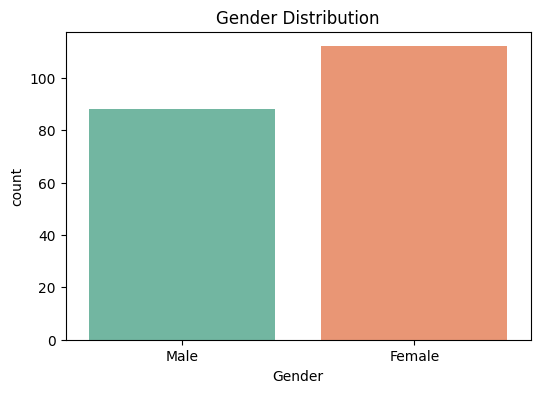

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

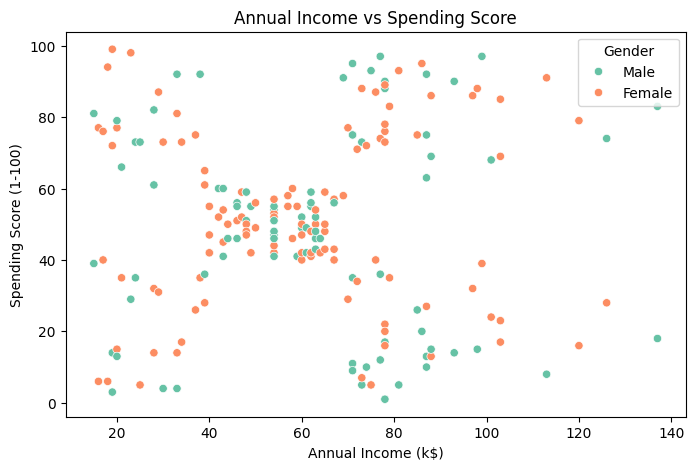

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Annual Income vs Spending Score')
plt.show()

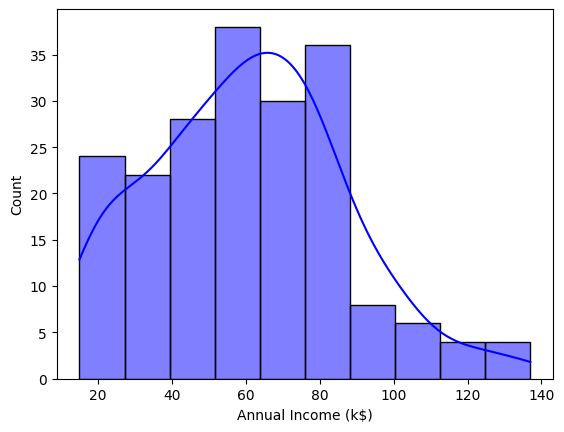

In [ ]:
sns.histplot(df["Annual Income (k$)"], kde=True, color="blue", bins=10)
plt.show()

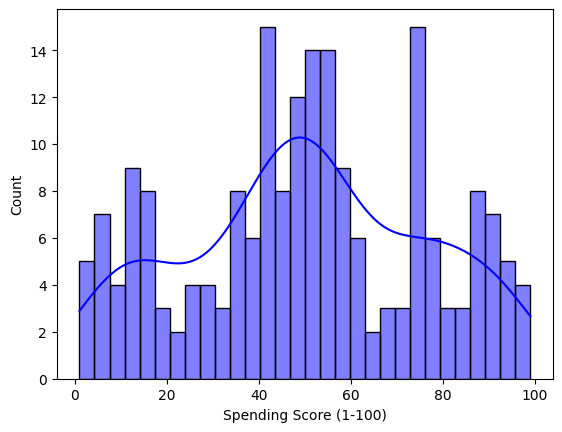

In [ ]:
sns.histplot(df["Spending Score (1-100)"], kde=True, color="blue", bins=30)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [ ]:
X = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled, columns=X.columns).head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


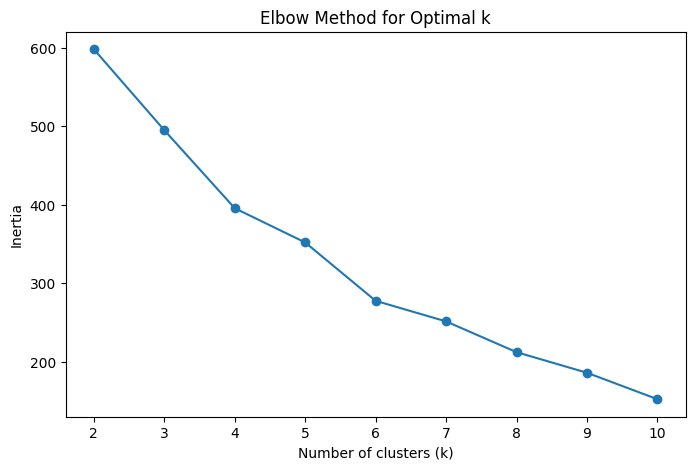

In [ ]:
from sklearn.cluster import KMeans
# Step 4: Elbow Method
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#Silhouette Score
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.278
k=3, silhouette score=0.258
k=4, silhouette score=0.290
k=5, silhouette score=0.272
k=6, silhouette score=0.335


k=2 → 0.252 (weak separation)
k=3 → 0.260 (still weak)
k=4 → 0.302 (better)
k=5 → 0.317 (stronger)
k=6 → 0.334 (best so far)
Interpretation: The silhouette score improves as k increases, peaking at k=6. That suggests 6 clusters give the cleanest separation in this dataset. The elbow method usually shows a bend around 4–6, so this matches nicely

In [ ]:
#Fit KMeans with k=6
best_k = 6
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


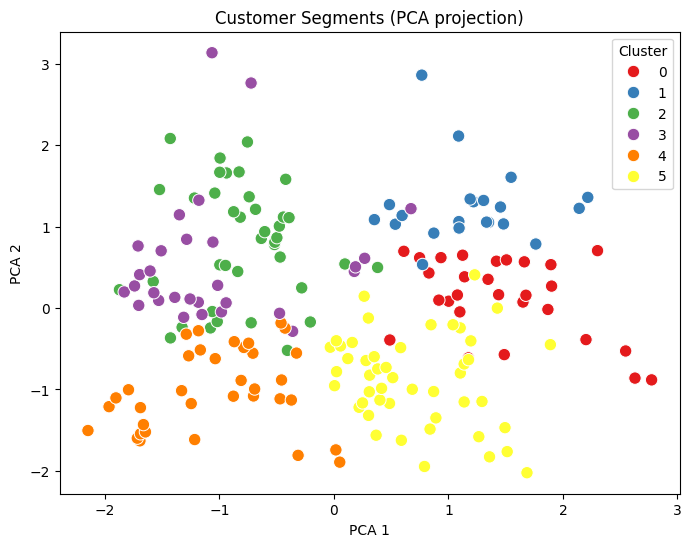

In [ ]:
from sklearn.decomposition import PCA
#PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=80)
plt.title("Customer Segments (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

Cluster Interpretation (example)

Cluster 0 → Younger, high spending
Cluster 1 → Older, low spending
Cluster 2 → High income, moderate spending
Cluster 3 → Low income, high spending
Cluster 4 → Balanced group
Cluster 5 → High income, high spending

In [ ]:
#Cluster summary statistics
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
cluster_summary

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.000000,57.214286,46.785714,38.714286
1,0.904762,39.000000,88.333333,14.428571
2,1.000000,28.410256,58.230769,70.717949
3,0.068966,33.206897,91.034483,72.137931
4,0.000000,25.888889,41.277778,57.944444
5,0.000000,49.914894,54.255319,36.531915


In [ ]:
cluster_summary.style.background_gradient(cmap="YlGnBu")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.000000,57.214286,46.785714,38.714286
1,0.904762,39.000000,88.333333,14.428571
2,1.000000,28.410256,58.230769,70.717949
3,0.068966,33.206897,91.034483,72.137931
4,0.000000,25.888889,41.277778,57.944444
5,0.000000,49.914894,54.255319,36.531915


Cluster 0 → Wealthy but cautious spenders.
Cluster 5 → Premium customers: high income + high spending.
Cluster 4 → Young, mid‑income, but high spending (trend‑driven buyers).
Clusters 2 & 3 → Older groups with modest spending.
Cluster 1 → Young females, moderate income, moderate spending (potential growth segment).

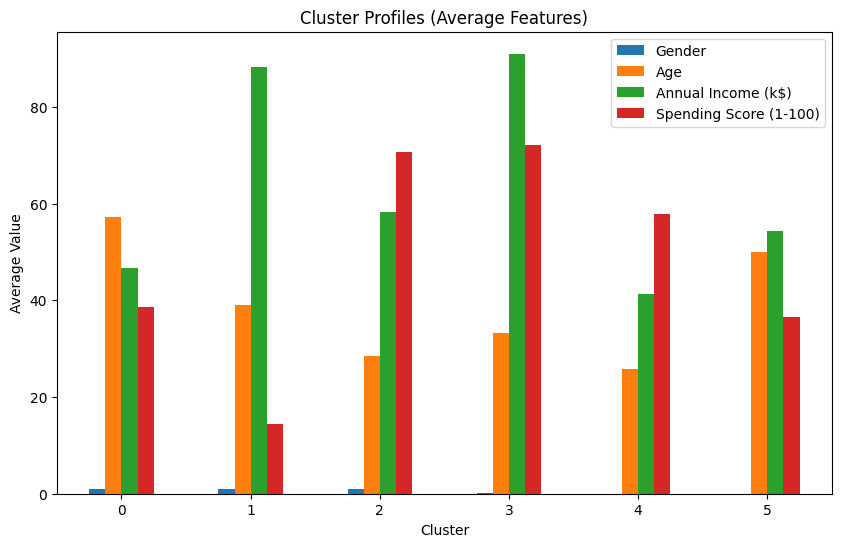

In [ ]:
# Bar chart of cluster averages
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)

cluster_summary.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles (Average Features)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.show()

In [ ]:
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Size: {len(cluster_data)}")
    print(f"Average Income: {cluster_data['Annual Income (k$)'].mean():.2f}")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f}")


Cluster 0:
Size: 28
Average Income: 46.79
Average Spending Score: 38.71

Cluster 1:
Size: 21
Average Income: 88.33
Average Spending Score: 14.43

Cluster 2:
Size: 39
Average Income: 58.23
Average Spending Score: 70.72

Cluster 3:
Size: 29
Average Income: 91.03
Average Spending Score: 72.14

Cluster 4:
Size: 36
Average Income: 41.28
Average Spending Score: 57.94
